### Exercise for running Trajectories_AOD

Imagine I want to calculate the back-trajectories for the first 10 days of April 2019 for the Aburrá Valley (lat=6.25, lon=-75.6) and identify the AOD magnitudes of the parcel that approached the valley through their path. Then, I must ensure I have the files in my path for uwnd.2019.nc, vwnd.2019.nc and omega.2019.nc and because I am tracking AOD, I also must have AOD_04-2019.nc. So, let's start!

In [3]:
import Trajectories_AOD

### The following packages are only needed for this sapacific example, the code still can work without them
import pickle
import numpy as np
import pandas as pd

Trajectories_AOD has the class *Follow*, in this you should add the initial and final date for running the trajectories.
Note: Your data should cover the selected period.

In [2]:

## It it is more conrftable for your work you can directly change the default values of lati, loni and path in the main code.
Tr=Trajectories_AOD.Follow(Fechai='2019-04-01',Fechaf='2019-04-10',path='D:/ERA/Trayectorias/',lati=6.25,loni=-75.6)

The function *Trajectories* is the entrance of any other option needed for your tractories:
- AOD: is a (boolean, default=False),
- ndays: (number, default=8) ending number of days back or forward for calculating trajectories
- delta_d: (number, default=3) number of hours for calculating every step back or forward.
- back: is a (boolean, default= True), True for back-trajectories, False for Forward-trajectories
- plevels: pressure levels [hPa] for staring trajectories calculation (array, np.array([850,800,750,700,650,600,550,500]))

In [ ]:
Tr.Trajectories(AOD=True, plevels=np.array([850,800,750]),ndays=3) 

The trajectories are comprised in a nested dictionary as *self.BT* which for this example is *Tr.BT*
- lat_traj and lon_traj: have the latitude and longitude in degrees for every step of the trajectory 
- plev_traj: contains the pressure levels for every step in hPa units.
- datetime_traj: has the starting time of all trajectories ran.
- steps_traj: contains the date and time for every step.
- aod_traj: AOD information 

In [4]:
Tr.BT.keys() 

dict_keys(['lat_traj', 'lon_traj', 'plev_traj', 'datetime_traj', 'steps_traj', 'aod_traj'])

Every key is 3D; the first dimension has the information for every pressure level (i.e., plevels), the second for every starting point, and the last for every trajectory step. So, for this example if I am asking for Tr.BT['lat_traj'][0,:,-1], this requests the last latitudinal position of every trajectory that started in the pressure level 850. 

In [5]:
np.shape(Tr.BT['lat_traj'])  # plevels, starting points, step points

(3, 73, 25)

Now, see what our code calculates!

c:\Users\eempvg\AppData\Local\anaconda3\envs\Traj\Lib\site-packages\cartopy\mpl\geoaxes.py:1696: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  result = super().scatter(*args, **kwargs)
c:\Users\eempvg\AppData\Local\anaconda3\envs\Traj\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\eempvg\AppData\Local\anaconda3\envs\Traj\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\eempvg\AppData\Local\anaconda3\envs\Traj\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\eempvg\AppData\Local\anaconda3\envs\Tra

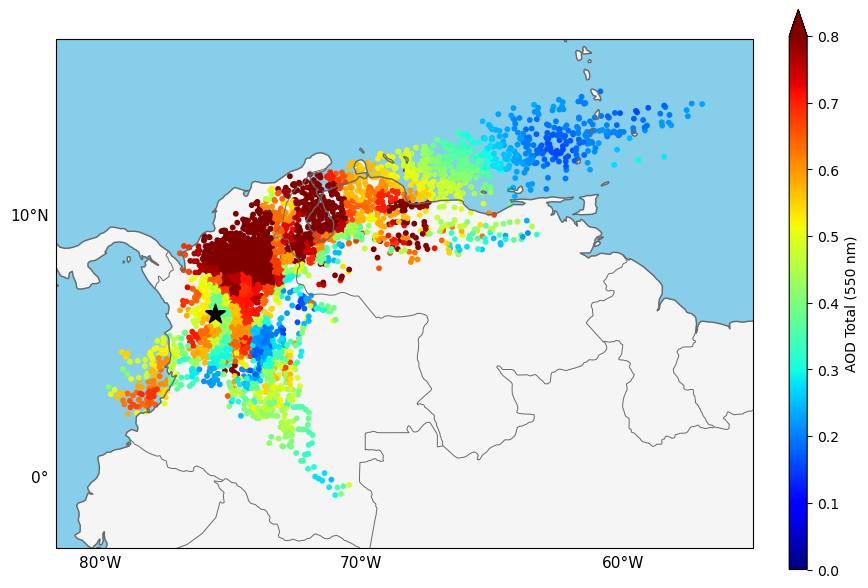

In [6]:
Tr.Plot_Trajectories()

The following lines are for storing the dictionary Tr.BT

In [12]:
f = open("Tj_example_"+pd.to_datetime(Tr.Fechai).strftime('%Y%m')+".pkl","wb")
pickle.dump(Tr.BT,f)